# I- REDUCTION DES BRUITS 

## 1- Filtre moyenneur

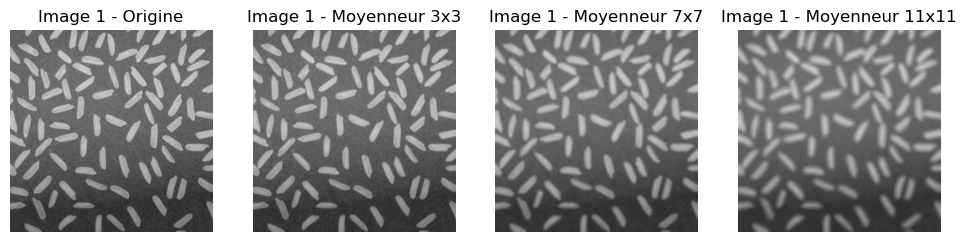

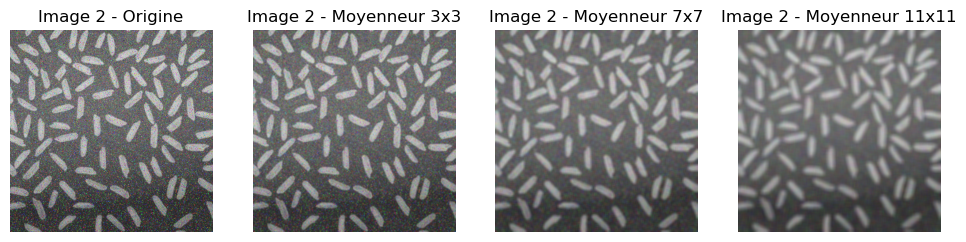

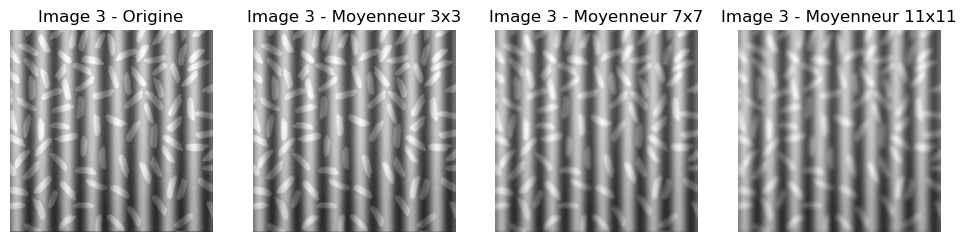

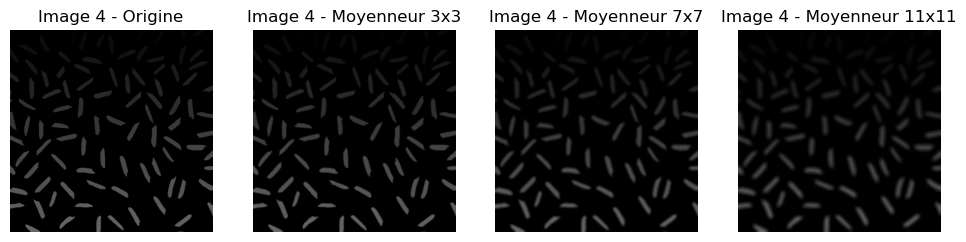

In [166]:
import cv2
import matplotlib.pyplot as plt

# Liste des chemins d'accès aux fichiers d'images
image_paths = ['/home/ericka/Pictures/1_wIXlvBeAFtNVgJd49VObgQ.png', '/home/ericka/Pictures/1_wIXlvBeAFtNVgJd49VObgQ.png_Salt_Pepper_Noise1.png', '/home/ericka/Pictures/1_wIXlvBeAFtNVgJd49VObgQ_sinus.png', '/home/ericka/Pictures/1_zd6ypc20QAIFMzrbCmJRMg.png']

# Boucle pour charger et traiter chaque image
for i, image_path in enumerate(image_paths):
    # Charger l'image depuis le chemin du fichier
    image = cv2.imread(image_path)

    # Vérifier si l'image a été chargée correctement
    if image is None:
        print(f"Impossible de charger l'image {image_path}")
    else:
        # Appliquer un filtre moyenneur avec différentes tailles de fenêtre
        image_lissee_3x3 = cv2.blur(image, (3, 3))
        image_lissee_7x7 = cv2.blur(image, (7, 7))
        image_lissee_11x11 = cv2.blur(image, (11, 11))

        # Afficher les images
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 4, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(f"Image {i + 1} - Origine")
        plt.axis('off')  # Masquer les axes

        plt.subplot(1, 4, 2)
        plt.imshow(cv2.cvtColor(image_lissee_3x3, cv2.COLOR_BGR2RGB))
        plt.title(f"Image {i + 1} - Moyenneur 3x3")
        plt.axis('off')  # Masquer les axes

        plt.subplot(1, 4, 3)
        plt.imshow(cv2.cvtColor(image_lissee_7x7, cv2.COLOR_BGR2RGB))
        plt.title(f"Image {i + 1} - Moyenneur 7x7")
        plt.axis('off')  # Masquer les axes

        plt.subplot(1, 4, 4)
        plt.imshow(cv2.cvtColor(image_lissee_11x11, cv2.COLOR_BGR2RGB))
        plt.title(f"Image {i + 1} - Moyenneur 11x11")
        plt.axis('off')  # Masquer les axes

        plt.show()



INTERPRETATION: 
* Le filtre moyenneur utilisé dans ce code sert à lisser une image en remplaçant la valeur de chaque pixel par la moyenne des valeurs des pixels environnants. En utilisant une fenêtre (ou noyau) de taille spécifiée, le filtre calcule la moyenne des intensités des pixels situés dans cette fenêtre et assigne cette moyenne au pixel central. 

* Dans l'exécution de ce code, on constate que plus on augmente la taile du filtre, plus les images deviennent très floues

* Parmi toutes les images utilisées, le filtre moyenneur agit plus sur la première image car  il atténue le "bruit de moyenne" ou le "bruit aléatoire" de cet image. Ce type de bruit est généralement causé par des variations aléatoires de l'intensité des pixels de l'image. Le bruit aléatoire peut donner à une image un aspect granuleux ou perturber les détails fins.

## 2- Filtre Gaussien
* Le filtre gaussien est généralement utilisé pour réduire le bruit de type "bruit gaussien" ou "bruit aléatoire". Ce type de bruit est souvent causé par des variations aléatoires de l'intensité des pixels dans une image. Il peut donner à une image un aspect granuleux ou perturber les détails fins.

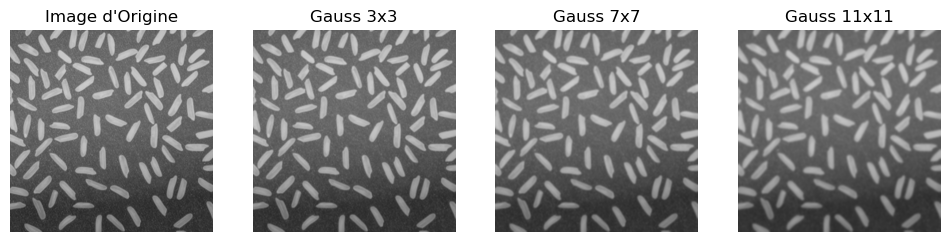

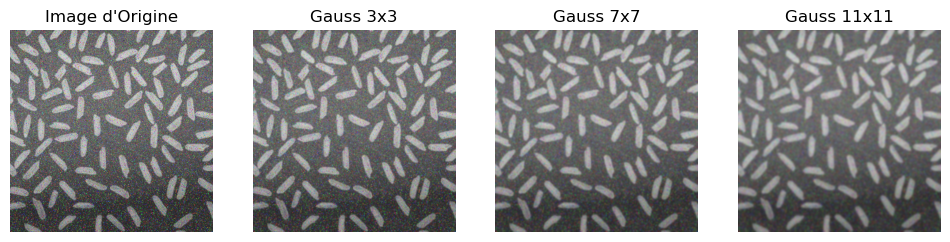

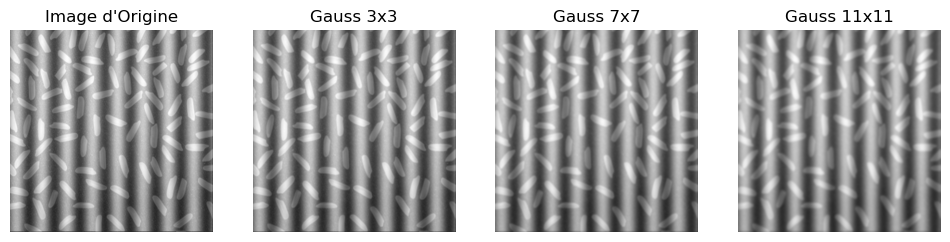

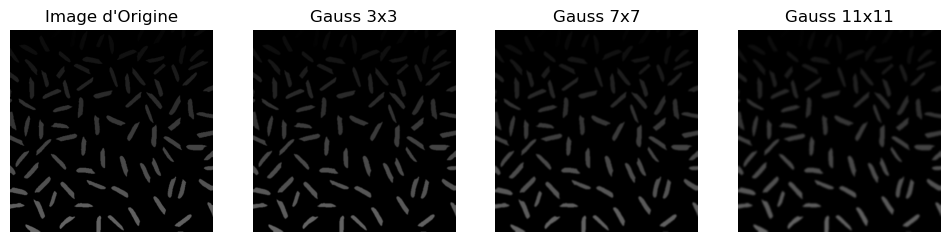

In [117]:
import cv2
import matplotlib.pyplot as plt

# Liste des chemins d'accès aux fichiers d'images
image_paths = ['/home/ericka/Pictures/1_wIXlvBeAFtNVgJd49VObgQ.png', '/home/ericka/Pictures/1_wIXlvBeAFtNVgJd49VObgQ.png_Salt_Pepper_Noise1.png', '/home/ericka/Pictures/1_wIXlvBeAFtNVgJd49VObgQ_sinus.png', '/home/ericka/Pictures/1_zd6ypc20QAIFMzrbCmJRMg.png']

# Tailles de noyau gaussien pour le filtre gaussien
kernel_sizes = [(3, 3), (7, 7), (11, 11)]

for image_path in image_paths:
    # Charger l'image depuis le chemin du fichier
    image = cv2.imread(image_path)

    # Vérifier si l'image a été chargée correctement
    if image is None:
        print(f"Impossible de charger l'image {image_path}")
    else:
        # Créer une figure pour chaque image
        plt.figure(figsize=(12, 6))
        
        # Afficher l'image d'origine
        plt.subplot(1, len(kernel_sizes) + 1, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("Image d'Origine")
        plt.axis('off')  # Masquer les axes
        
        # Appliquer un filtre gaussien avec différentes tailles de noyau
        for i, kernel_size in enumerate(kernel_sizes):
            image_floue = cv2.GaussianBlur(image, kernel_size, 0)
            plt.subplot(1, len(kernel_sizes) + 1, i + 2)
            plt.imshow(cv2.cvtColor(image_floue, cv2.COLOR_BGR2RGB))
            plt.title(f"Gauss {kernel_size[0]}x{kernel_size[1]}")
            plt.axis('off')  # Masquer les axes
        
        # Afficher la figure
        plt.show()

Interpretation: 
* La taille du noyau détermine l'étendue spatiale de la distribution gaussienne utilisée pour flouter l'image.
* Un noyau plus grand donnera un flou gaussien plus prononcé, tandis qu'un noyau plus petit donnera un flou plus subtil.
* La variance est un paramètre qui contrôle la forme de la distribution gaussienne appliquée au filtre.
* Une variance plus grande produit une distribution gaussienne plus étalée, ce qui donne un flou plus prononcé.
* Dans le cas des images qu'on a eu à utiliser le filtre agit plus sur la première et la troisième images car il atténue le "bruit aléatoire" de ces images.


## 3- Filtre Median 


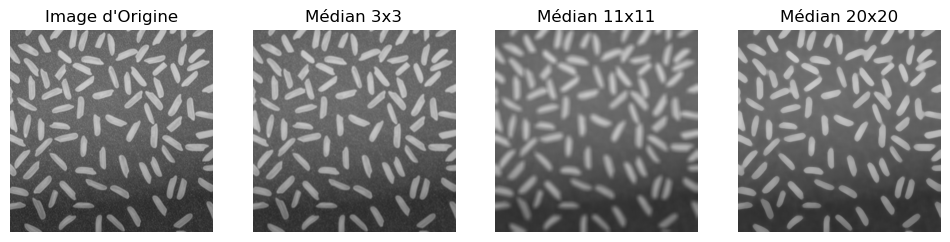

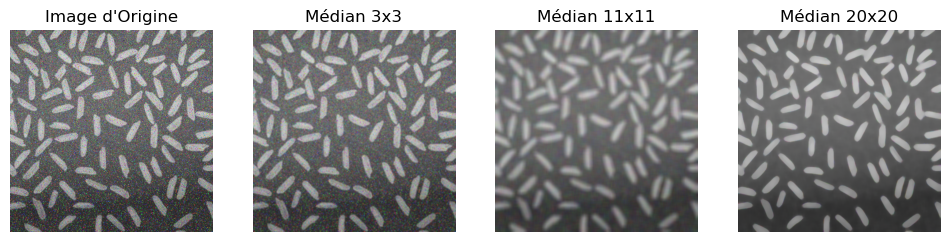

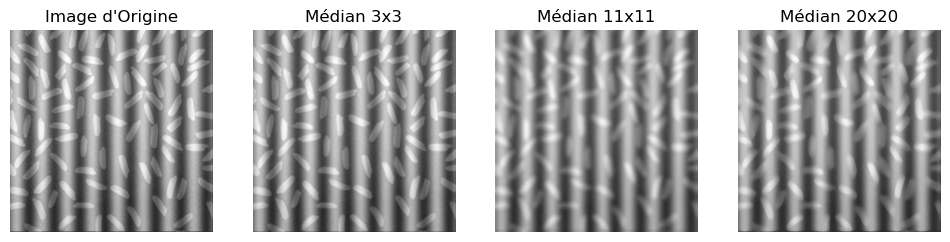

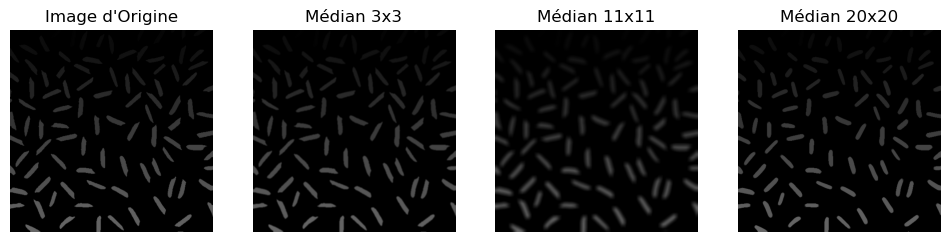

In [165]:
import cv2
import matplotlib.pyplot as plt

# Liste des chemins d'accès aux fichiers d'images
image_paths = ['/home/ericka/Pictures/1_wIXlvBeAFtNVgJd49VObgQ.png', '/home/ericka/Pictures/1_wIXlvBeAFtNVgJd49VObgQ.png_Salt_Pepper_Noise1.png', '/home/ericka/Pictures/1_wIXlvBeAFtNVgJd49VObgQ_sinus.png', '/home/ericka/Pictures/1_zd6ypc20QAIFMzrbCmJRMg.png']

for image_path in image_paths:
    # Charger l'image depuis le chemin du fichier
    image = cv2.imread(image_path)

    # Vérifier si l'image a été chargée correctement
    if image is None:
        print(f"Impossible de charger l'image {image_path}")
    else:
        # Créer une figure pour chaque image
        plt.figure(figsize=(12, 4))
        
        # Afficher l'image d'origine
        plt.subplot(1, 4, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("Image d'Origine")
        plt.axis('off')  # Masquer les axes
        
        # Appliquer un filtre de moyenne 3x3
        image_moyenne_3x3 = cv2.blur(image, (3, 3))
        plt.subplot(1, 4, 2)
        plt.imshow(cv2.cvtColor(image_moyenne_3x3, cv2.COLOR_BGR2RGB))
        plt.title("Médian 3x3")
        plt.axis('off')  # Masquer les axes

        # Appliquer un filtre de moyenne 11x11
        image_moyenne_11x11 = cv2.blur(image, (11, 11))
        plt.subplot(1, 4, 3)
        plt.imshow(cv2.cvtColor(image_moyenne_11x11, cv2.COLOR_BGR2RGB))
        plt.title("Médian 11x11")
        plt.axis('off')  # Masquer les axes

        # Appliquer un filtre médian 20x120
        image_median_20x20 = cv2.medianBlur(image, 11)
        plt.subplot(1, 4, 4)
        plt.imshow(cv2.cvtColor(image_median_20x20, cv2.COLOR_BGR2RGB))
        plt.title("Médian 20x20")
        plt.axis('off')  # Masquer les axes
        
        # Afficher la figure
        plt.show()


INTERPRETATION: 
* Le bruit "de sel et de poivre" est un type de bruit impulsionnel qui ajoute des pixels très brillants (sel) ou très sombres (poivre) de manière aléatoire à une image. Ce type de bruit peut être extrêmement perturbateur et difficile à éliminer avec d'autres filtres.
* Le filtre médian fonctionne en remplaçant la valeur d'un pixel par la médiane des valeurs des pixels dans un voisinage défini (un noyau). En utilisant le filtre médian, les pixels bruités de manière impulsionnelle (sel ou poivre) sont souvent éliminés, car ils se distinguent considérablement de leurs voisins en termes d'intensité. Le filtre médian conserve généralement les bords et les détails de l'image beaucoup mieux que d'autres filtres lorsqu'il s'agit de bruit impulsionnel.

## 4- Filtre Min V8

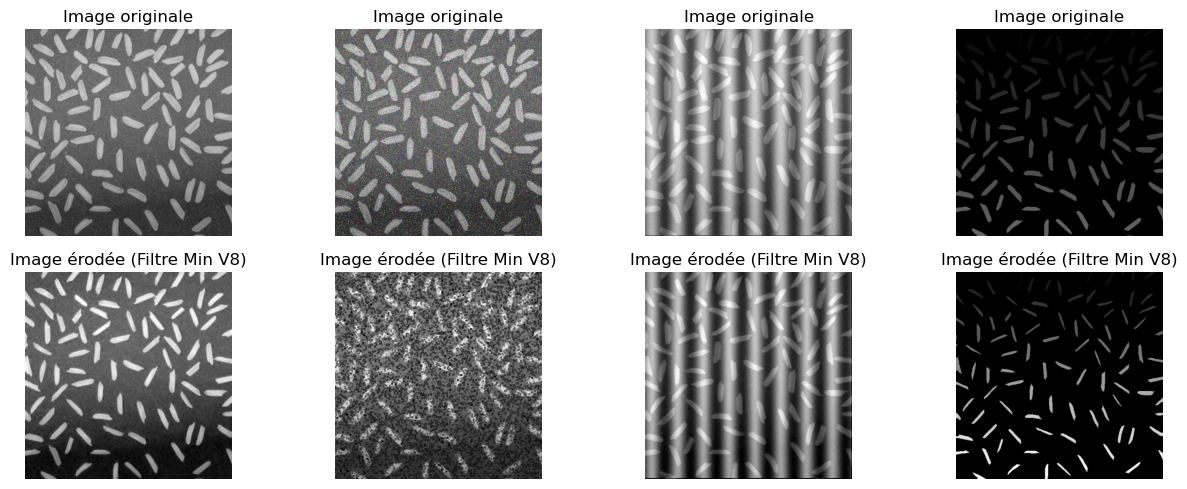

In [161]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Liste des chemins d'accès aux images
image_paths = [
    '/home/ericka/Pictures/1_wIXlvBeAFtNVgJd49VObgQ.png',
    '/home/ericka/Pictures/1_wIXlvBeAFtNVgJd49VObgQ.png_Salt_Pepper_Noise1.png',
    '/home/ericka/Pictures/1_wIXlvBeAFtNVgJd49VObgQ_sinus.png',
    '/home/ericka/Pictures/1_zd6ypc20QAIFMzrbCmJRMg.png'
]

# Appliquer une érosion à chaque image en utilisant le filtre Min V8
images_eroded = []

for image_path in image_paths:
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Définir un noyau (kernel) pour le filtre Min V8
    kernel = np.array([[1, 1, 1, 1],
                       [1, 1, 1, 1],
                       [1, 1, 1, 1],
                       [1, 1, 1, 1]], dtype=np.uint8)

    # Appliquer une érosion à l'image en utilisant le filtre Min V8
    image_erode = cv2.erode(image, kernel, iterations=1)
    images_eroded.append(image_erode)

# Afficher les images originales et les images érodées avec le filtre Min V8
plt.figure(figsize=(13, 5))

for i in range(len(image_paths)):
    plt.subplot(2, len(image_paths), i + 1)
    plt.imshow(cv2.cvtColor(cv2.imread(image_paths[i]), cv2.COLOR_BGR2RGB))
    plt.title('Image originale')
    plt.axis('off')

    plt.subplot(2, len(image_paths), i + len(image_paths) + 1)
    plt.imshow(images_eroded[i], cmap='gray')
    plt.title('Image érodée (Filtre Min V8)')
    plt.axis('off')

plt.tight_layout()
plt.show()


INTERPRETATION:  Ce filtre est utilisé pour réduire la taille des objets binaires dans une image. Il remplace chaque pixel par la valeur minimum parmi ses huit voisins (voisins V8), ce qui a pour effet de "rétrécir" les objets blancs et de "dilater" les objets noirs. Il est couramment utilisé pour l'érosion dans le cadre de la morphologie mathématique, qui est une opération visant à réduire la taille des objets dans une image binaire.

## 5- Filtre Max V8

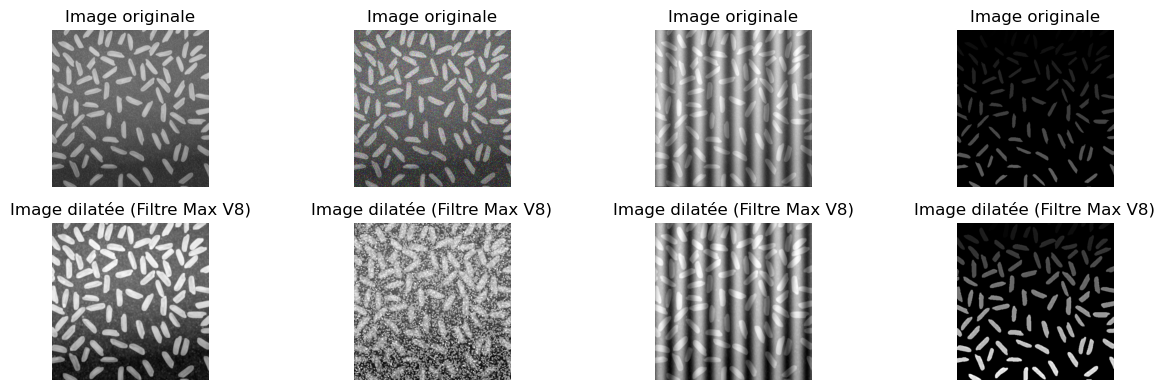

In [160]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Liste des chemins d'accès aux images
image_paths = [
    '/home/ericka/Pictures/1_wIXlvBeAFtNVgJd49VObgQ.png',
    '/home/ericka/Pictures/1_wIXlvBeAFtNVgJd49VObgQ.png_Salt_Pepper_Noise1.png',
    '/home/ericka/Pictures/1_wIXlvBeAFtNVgJd49VObgQ_sinus.png',
    '/home/ericka/Pictures/1_zd6ypc20QAIFMzrbCmJRMg.png'
]

# Appliquer une dilatation à chaque image en utilisant le filtre Max V8
images_dilated = []

for image_path in image_paths:
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Définir un noyau (kernel) pour le filtre Max V8
    kernel = np.array([[1, 1, 1, 1],
                       [1, 1, 1, 1],
                       [1, 1, 1, 1],
                       [1, 1, 1, 1]], dtype=np.uint8)

    # Appliquer une dilatation à l'image en utilisant le filtre Max V8
    image_dilate = cv2.dilate(image, kernel, iterations=1)
    images_dilated.append(image_dilate)

# Afficher les images originales et les images dilatées avec le filtre Max V8
plt.figure(figsize=(13, 4))

for i in range(len(image_paths)):
    plt.subplot(2, len(image_paths), i + 1)
    plt.imshow(cv2.cvtColor(cv2.imread(image_paths[i]), cv2.COLOR_BGR2RGB))
    plt.title('Image originale')
    plt.axis('off')

    plt.subplot(2, len(image_paths), i + len(image_paths) + 1)
    plt.imshow(images_dilated[i], cmap='gray')
    plt.title('Image dilatée (Filtre Max V8)')
    plt.axis('off')

plt.tight_layout()
plt.show()



Interprétation: Ce filtre est utilisé pour agrandir les objets binaires dans une image. Il remplace chaque pixel par la valeur maximum parmi ses huit voisins (voisins V8), ce qui a pour effet de "dilater" les objets blancs et de "rétrécir" les objets noirs. Il est couramment utilisé pour la dilatation dans le cadre de la morphologie mathématique, qui est une opération visant à augmenter la taille des objets dans une image binaire. 

# II- DETECTION DES CONTOURS

## II-1- Filtre  Sobel avec seuillage de la norme du gradient : Gaussien + Dérivée

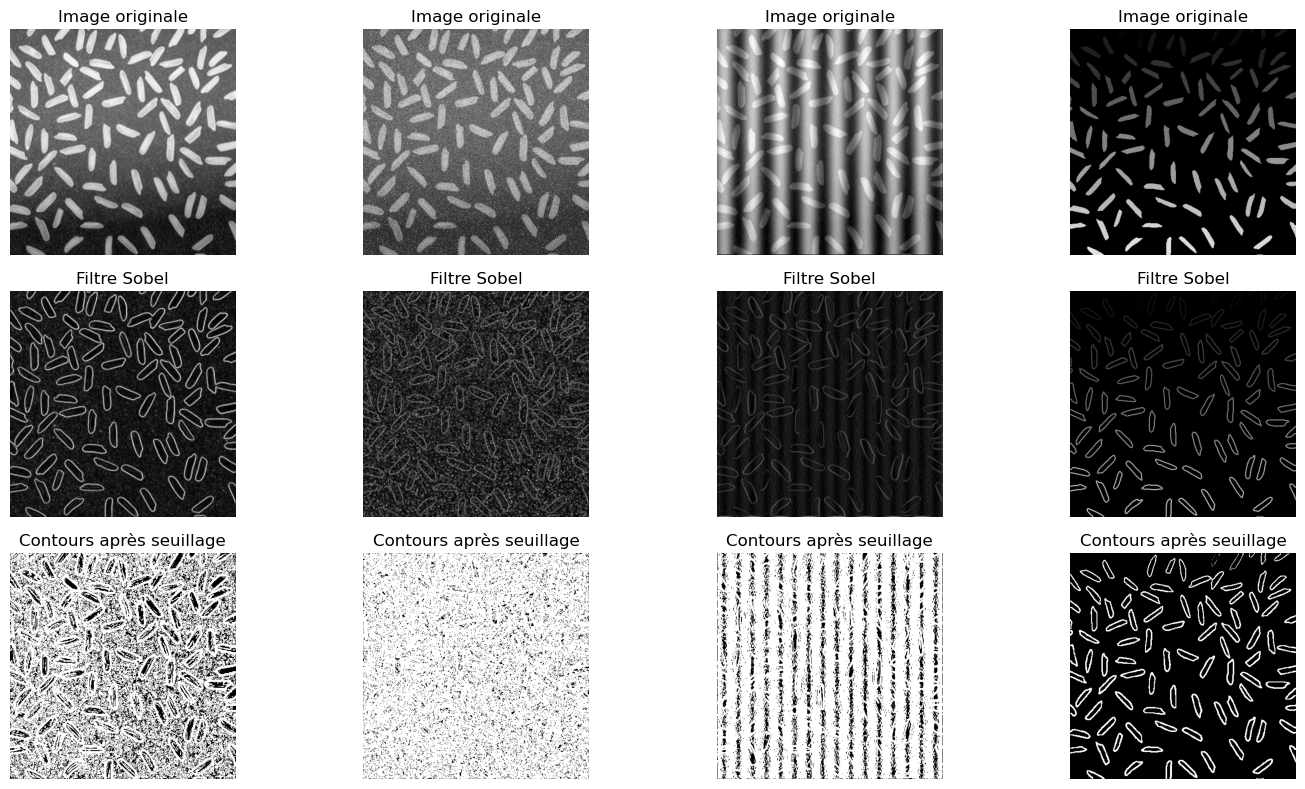

In [141]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Liste des chemins d'accès aux images
image_paths = [
    '/home/ericka/Pictures/1_wIXlvBeAFtNVgJd49VObgQ.png',
    '/home/ericka/Pictures/1_wIXlvBeAFtNVgJd49VObgQ.png_Salt_Pepper_Noise1.png',
    '/home/ericka/Pictures/1_wIXlvBeAFtNVgJd49VObgQ_sinus.png',
    '/home/ericka/Pictures/1_zd6ypc20QAIFMzrbCmJRMg.png'
]

# Liste pour stocker les images chargées
images = []

# Charger chaque image en niveaux de gris et les stocker dans la liste 'images'
for image_path in image_paths:
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is not None:
        images.append(image)
    else:
        print(f"Impossible de charger l'image à partir de : {image_path}")

# Appliquer le filtre Sobel pour les contours horizontaux et verticaux
contour_images = []

for image in images:
    gradient_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    gradient_total = np.sqrt(gradient_x**2 + gradient_y**2)
    contour_images.append(gradient_total)

# Appliquer le seuillage de la norme du gradient
seuil = 20  # Ajustez ce seuil selon vos besoins
contours = []

for contour_image in contour_images:
    contour = np.where(contour_image > seuil, 255, 0).astype(np.uint8)
    contours.append(contour)

# Afficher les images originales, les images du gradient total et les images seuillées
plt.figure(figsize=(15, 8))

for i in range(len(image_paths)):
    plt.subplot(3, len(image_paths), i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title('Image originale')
    plt.axis('off')

    plt.subplot(3, len(image_paths), i + len(image_paths) + 1)
    plt.imshow(contour_images[i], cmap='gray')
    plt.title('Filtre Sobel')
    plt.axis('off')

    plt.subplot(3, len(image_paths), i + 2 * len(image_paths) + 1)
    plt.imshow(contours[i], cmap='gray')
    plt.title('Contours après seuillage')
    plt.axis('off')

plt.tight_layout()
plt.show()


Interprétation: 
1. **Image originale** : L'image originale est l'image en niveaux de gris que vous avez chargée à partir des fichiers spécifiés. C'est votre point de départ pour la détection de contours.

2. **Image du gradient total (Filtre Sobel)** : Cette image représente le résultat de l'application du filtre de Sobel pour la détection des contours. Le filtre de Sobel est utilisé pour détecter les contours horizontaux et verticaux dans l'image. Les zones où il y a des variations abruptes d'intensité (c'est-à-dire les contours) sont mises en évidence. Cette image du gradient total montre à la fois les contours horizontaux et verticaux.

3. **Contours après seuillage** : Cette image montre les contours détectés après l'application du seuillage à la norme du gradient. Le seuillage est utilisé pour binariser l'image, où les pixels ayant une magnitude de gradient supérieure à un seuil spécifique sont représentés en blanc (255), tandis que les autres pixels sont en noir (0). Les contours détectés sont donc clairement visibles en blanc sur un fond noir.

L'interprétation générale de ces résultats est que le filtre de Sobel est efficace pour détecter les contours dans l'image en mettant en évidence les variations d'intensité associées aux contours horizontaux et verticaux. Le seuillage permet de simplifier les contours en les rendant binaires, de sorte que les contours détectés sont faciles à distinguer du reste de l'image. Vous pouvez ajuster la valeur du seuil (`seuil`) en fonction de vos besoins pour contrôler la sensibilité de la détection des contours.

## II-2- Filtre Canny

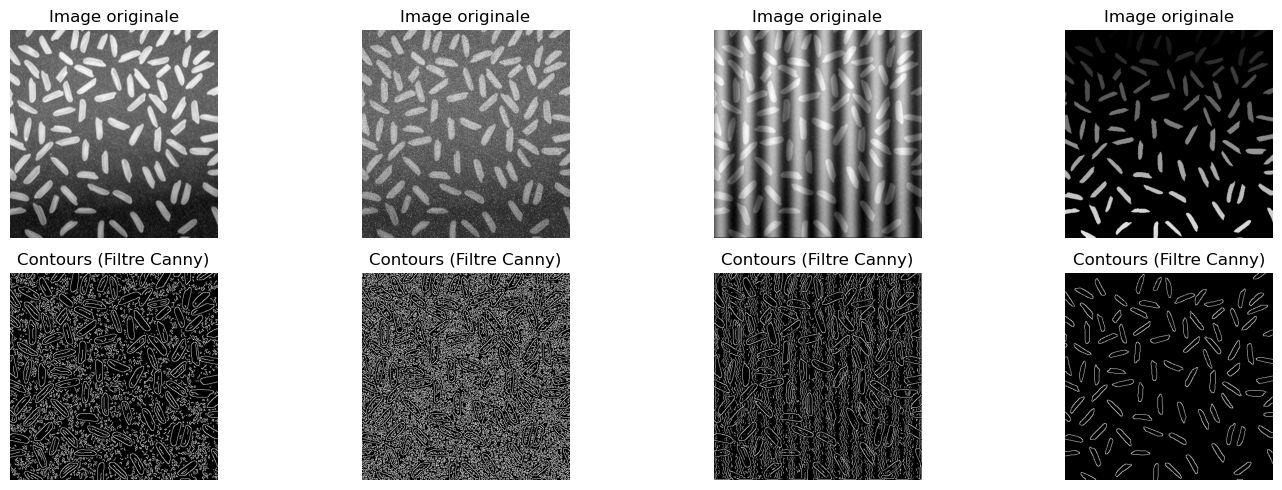

In [143]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Liste des chemins d'accès aux images
image_paths = [
    '/home/ericka/Pictures/1_wIXlvBeAFtNVgJd49VObgQ.png',
    '/home/ericka/Pictures/1_wIXlvBeAFtNVgJd49VObgQ.png_Salt_Pepper_Noise1.png',
    '/home/ericka/Pictures/1_wIXlvBeAFtNVgJd49VObgQ_sinus.png',
    '/home/ericka/Pictures/1_zd6ypc20QAIFMzrbCmJRMg.png'
]

# Liste pour stocker les images chargées
images = []

# Charger chaque image en niveaux de gris et les stocker dans la liste 'images'
for image_path in image_paths:
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is not None:
        images.append(image)
    else:
        print(f"Impossible de charger l'image à partir de : {image_path}")

# Appliquer le filtre Gaussien et la détection de contours avec Canny pour chaque image
edges_images = []

for image in images:
    # Étape 1 : Réduction du Bruit par un Filtre Gaussien
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Étape 4 : Suppression des Non-Maximums et détection de contours avec Canny
    edges = cv2.Canny(blurred, threshold1=20, threshold2=30)
    edges_images.append(edges)

# Afficher les images originales et les images des contours détectés avec Canny
plt.figure(figsize=(15, 5))

for i in range(len(image_paths)):
    plt.subplot(2, len(image_paths), i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title('Image originale')
    plt.axis('off')

    plt.subplot(2, len(image_paths), i + len(image_paths) + 1)
    plt.imshow(edges_images[i], cmap='gray')
    plt.title('Contours (Filtre Canny)')
    plt.axis('off')

plt.tight_layout()
plt.show()


INTERPETATION: avec le filtre Cany, on constate que la modification des paramètres sur la réduction du bruit par un filtre Gaussien et ceux sur la suppression des Non-Maximums impactent grandement sur la définition des contours

1. **Image originale** : Chacune des images d'origine est affichée en niveaux de gris. 

2. **Contours (Filtre Canny)** : L'image résultante montre les contours détectés. Les contours sont représentés en blanc sur un fond noir. Plus précisément :
   - Les zones où il y a des contours significatifs (variations brusques d'intensité) sont mises en évidence en blanc.
   - Les zones sans contours ou avec des contours faibles restent noires.

L'objectif principal de cette opération est de mettre en évidence les contours présents dans les images d'origine. Cela peut être utile pour des tâches telles que la détection d'objets, la segmentation d'images, ou simplement pour améliorer la visualisation des structures dans les images. Le filtre Canny est un outil efficace pour cette tâche car il permet de détecter des contours nets tout en réduisant le bruit dans l'image grâce à l'étape de lissage par un filtre Gaussien.

# III- CONVOLUTION AVEC UN FILTRE

La convolution avec un filtre est une opération polyvalente qui joue un rôle essentiel dans le traitement d'images en permettant de modifier, d'améliorer et d'extraire des informations utiles à partir d'une image. Elle est largement utilisée dans divers domaines, de la vision par ordinateur à la reconnaissance d'objets, en passant par le traitement d'images médicales et bien d'autres applications.

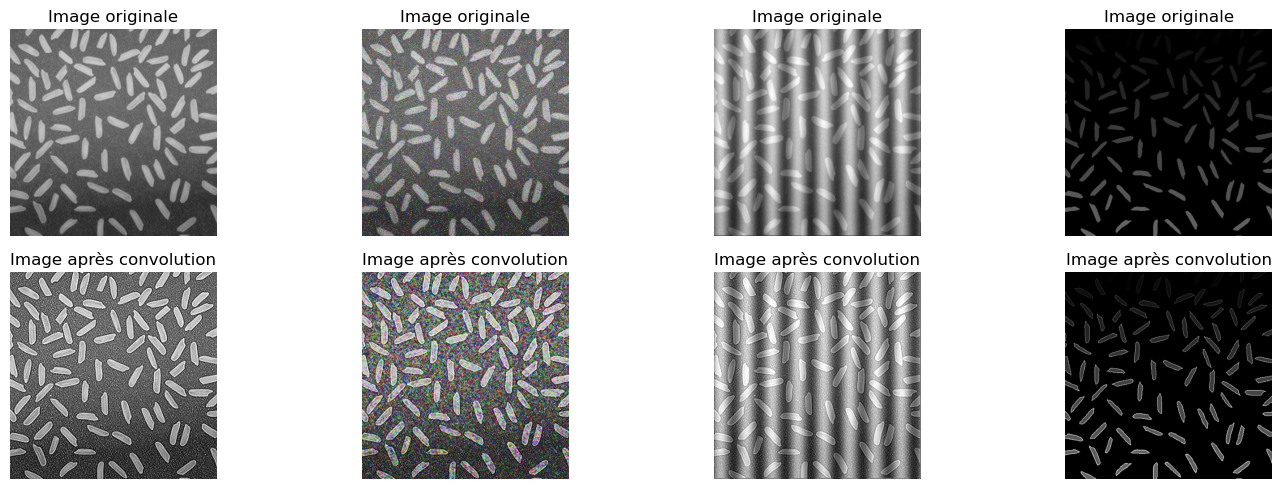

In [124]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Liste des chemins d'accès aux images
image_paths = [
    '/home/ericka/Pictures/1_wIXlvBeAFtNVgJd49VObgQ.png',
    '/home/ericka/Pictures/1_wIXlvBeAFtNVgJd49VObgQ.png_Salt_Pepper_Noise1.png',
    '/home/ericka/Pictures/1_wIXlvBeAFtNVgJd49VObgQ_sinus.png',
    '/home/ericka/Pictures/1_zd6ypc20QAIFMzrbCmJRMg.png'
]

# Charger chaque image, appliquer la convolution, et les stocker dans une liste
convolved_images = []
kernel = np.array([[-1, -1, -1],
                   [-1,  9, -1],
                   [-1, -1, -1]], dtype=np.float32)

for image_path in image_paths:
    image = cv2.imread(image_path)
    image_convolution = cv2.filter2D(image, -1, kernel)
    convolved_images.append(image_convolution)

# Afficher les images originales et les images après convolution côte à côte
num_images = len(image_paths)
plt.figure(figsize=(15, 5))

for i in range(num_images):
    plt.subplot(2, num_images, i + 1)
    plt.imshow(cv2.cvtColor(cv2.imread(image_paths[i]), cv2.COLOR_BGR2RGB))
    plt.title('Image originale')
    plt.axis('off')

    plt.subplot(2, num_images, i + num_images + 1)
    plt.imshow(cv2.cvtColor(convolved_images[i], cv2.COLOR_BGR2RGB))
    plt.title('Image après convolution')
    plt.axis('off')

plt.tight_layout()
plt.show()


#### Interprétation: En observant les resultats obtenues, ce filtre à pour objectif de diminuer le flou des images et de les rendre plus nettes et plus visbles